# Lab 1. PyTorch and ANNs

**Deadline**: Thursday, Oct 1, 11:59pm.

**Total**: 30 Points

**Late Penalty**: There is a penalty-free grace period of one hour past the deadline. Any work that is submitted between 1 hour and 24 hours past the deadline will receive a 20% grade deduction. No other late work is accepted. Quercus submission time will be used, not your local computer time. You can submit your labs as many times as you want before the deadline, so please submit often and early.

**Grading TA**: Justin Beland

This lab is partially based on an assignment developed by Prof. Jonathan Rose and Harris Chan.

This lab is a warm up to get you used to the PyTorch programming environment used
in the course, and also to help you review and renew your knowledge
of Python and relevant Python libraries.
The lab must be done individually. Please recall that the
University of Toronto plagarism rules apply.

By the end of this lab, you should be able to:

1. Be able to perform basic PyTorch tensor operations.
2. Be able to load data into PyTorch
3. Be able to configure an Artificial Neural Network (ANN) using PyTorch
4. Be able to train ANNs using PyTorch
5. Be able to evaluate different ANN configuations

You will need to use numpy and PyTorch documentations for this assignment:

* https://docs.scipy.org/doc/numpy/reference/
* https://pytorch.org/docs/stable/torch.html

You can also reference Python API documentations freely.


### What to submit

Submit a PDF file containing all your code, outputs, and write-up
from parts 1-5. You can produce a PDF of your Google Colab file by
going to **File > Print** and then save as PDF. The Colab instructions
has more information.

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission. 

With Colab, you can export a PDF file using the menu option
`File -> Print` and save as PDF file.  **Adjust the scaling to ensure that the text is not cutoff at the margins.**

## Colab Link

Submit make sure to include a link to your colab file here

Colab Link: https://drive.google.com/file/d/1UpGJ3wUhnenGasTgJWOofCP8llC6F63V/view?usp=sharing

## Part 1. Python Basics [3 pt]

The purpose of this section is to get you used to the 
basics of Python, including working with functions, numbers,
lists, and strings.

Note that we **will** be checking your code for clarity and efficiency.

If you have trouble with this part of the assignment, please review http://cs231n.github.io/python-numpy-tutorial/

### Part (a) -- 1pt

Write a function `sum_of_cubes` that computes the sum of cubes up to `n`. If the input to `sum_of_cubes` invalid (e.g. negative or non-integer `n`), the function should print out `"Invalid input"` and return `-1`.

In [ ]:
def sum_of_cubes(n):
  # sum of cubes up to n is equal to (n*(n+1)/2)**2
  if n < 0 or not(isinstance(n, int)):
    print("Invalid input")
    return -1
  else:
    return int((n*(n+1)/2)**2)

### Part (b) -- 1pt

Write a function `word_lengths` that takes a sentence (string), computes the length of each word in that sentence, and returns the length of each word in a list. You can
assume that words are always separated by a space character `" "`.

Hint: recall the `str.split` function in Python.
If you arenot sure how this function works, try
typing `help(str.split)` into a Python shell, or check out https://docs.python.org/3.6/library/stdtypes.html#str.split

In [ ]:
help(str.split)

Help on method_descriptor:

split(...)
    S.split(sep=None, maxsplit=-1) -> list of strings
    
    Return a list of the words in S, using sep as the
    delimiter string.  If maxsplit is given, at most maxsplit
    splits are done. If sep is not specified or is None, any
    whitespace string is a separator and empty strings are
    removed from the result.



In [ ]:
def word_lengths(sentence):
  words = sentence.split()
  return list(map(len, words))

print(word_lengths("This is a test string"))

[4, 2, 1, 4, 6]


### Part (c) -- 1pt

Write a function `all_same_length` that takes a sentence (string),
and checks whether every word in the string is the same length.
You should call the function `word_lengths` in the body
of this new function.


In [ ]:
def all_same_length(sentence):
  lengths = word_lengths(sentence)
  return max(lengths) == min(lengths)

print(all_same_length("Hello world"))
print(all_same_length("My name is APS360"))

True
False


## Part 2. NumPy Exercises [5 pt]

In this part of the assignment, you'll be manipulating arrays 
usign NumPy. Normally, we use the shorter name `np` to represent
the package `numpy`.

In [ ]:
import numpy as np

### Part (a) -- 1pt

The below variables `matrix` and `vector` are numpy arrays. Explain what you think `<NumpyArray>.size` and `<NumpyArray>.shape` represent.

In [ ]:
matrix = np.array([[1., 2., 3., 0.5],
                   [4., 5., 0., 0.],
                   [-1., -2., 1., 1.]])
vector = np.array([2., 0., 1., -2.])

In [ ]:
matrix.size 

12

In [ ]:
matrix.shape

(3, 4)

In [ ]:
vector.size

4

In [ ]:
vector.shape

(4,)

`<NumpyArray>.size` represents the total number of elements in the array. 

`<NumpyArray>.shape` represents the dimensions of the array.

### Part (b) -- 1pt

Perform matrix multiplication `output = matrix x vector` by using
for loops to iterate through the columns and rows.
Do not use any builtin NumPy functions.
Cast your output into a NumPy array, if it isn't one already.

Hint: be mindful of the dimension of output

In [ ]:
# Gives a new array with the same length of the matrix, with zeros.
output = np.zeros(len(matrix))
for i in range(len(matrix)):
  for j in range(len(vector)):
    output[i] += matrix[i][j] * vector[j]


In [ ]:
output

array([ 4.,  8., -3.])

### Part (c) -- 1pt

Perform matrix multiplication `output2 = matrix x vector` by using
the function `numpy.dot`.

We will never actually write code as in
part(c), not only because `numpy.dot` is more concise and easier to read/write, but also performance-wise `numpy.dot` is much faster (it is written in C and highly optimized).
In general, we will avoid for loops in our code.

In [ ]:
output2 = matrix.dot(vector)

In [ ]:
output2

array([ 4.,  8., -3.])

### Part (d) -- 1pt

As a way to test for consistency, show that the two outputs match.

In [ ]:
output == output2

array([ True,  True,  True])

### Part (e) -- 1pt

Show that using `np.dot` is faster than using your code from part (c).

You may find the below code snippit helpful:

In [ ]:
import time

# record the time before running code
start_time = time.time()

# place code to run here
for i in range(10000):
    99*99
    
# record the time after the code is run
end_time = time.time()

# compute the difference
diff = end_time - start_time
diff

0.0021085739135742188

In [ ]:
#================Compute time for running code in part (b)=================
# record the time before running code 
start_time1 = time.time()

output = np.zeros(len(matrix))
for i in range(len(matrix)):
  for j in range(len(vector)):
    output[i] += matrix[i][j] * vector[j]

# record the time after the code is run 
end_time1 = time.time()

# compute the difference 
diff1 = end_time1 - start_time1
print("part(b):", diff1)

#================Compute time for running code in part (c)=================
# record the time before running code
start_time2 = time.time()

output2 = matrix.dot(vector)

# record the time after the code is run 
end_time2 = time.time()

# compute the difference 
diff2 = end_time2 - start_time2
print("part(c):",diff2)

# return true if part (c) is faster than part (b)
print("return true if part (c) is faster than part (b):", diff2 < diff1)

part(b): 0.0002009868621826172
part(c): 0.00022721290588378906
return true if part (c) is faster than part (b): False


## Part 3. Images [6 pt]

A picture or image can be represented as a NumPy array of “pixels”, 
with dimensions H × W × C, where H is the height of the image, W is the width of the image,
and C is the number of colour channels. Typically we will use an image with channels that give the the Red, Green, and Blue “level” of each pixel, which is referred to with the short form RGB.

You will write Python code to load an image, and perform several array manipulations to the image and visualize their effects. 

In [ ]:
import matplotlib.pyplot as plt

### Part (a) -- 1 pt

This is a photograph of a dog whose name is Mochi.

![alt text](https://drive.google.com/uc?export=view&id=1oaLVR2hr1_qzpKQ47i9rVUIklwbDcews)

Load the image from its url (https://drive.google.com/uc?export=view&id=1oaLVR2hr1_qzpKQ47i9rVUIklwbDcews) into the variable `img` using the `plt.imread` function.

Hint: You can enter the URL directly into the `plt.imread` function as a Python string.

In [ ]:
import urllib.request
URL = 'https://drive.google.com/uc?export=view&id=1oaLVR2hr1_qzpKQ47i9rVUIklwbDcews'
with urllib.request.urlopen(URL) as url:
  img = plt.imread(url)

### Part (b) -- 1pt

Use the function `plt.imshow` to visualize `img`. 

This function will also show the coordinate system used to identify pixels.
The origin is at the top left corner, and the first dimension indicates the Y (row) direction, 
and the second dimension indicates the X (column) dimension.

In [ ]:
plt.imshow(img)
print(img)

### Part (c) -- 2pt

Modify the image by adding a constant value of 0.25 to each pixel in the `img` and
store the result in the variable `img_add`. Note that, since the range for the pixels 
needs to be between [0, 1], you will also need to clip img_add to be in the range [0, 1] 
using `numpy.clip`. Clipping sets any value that is outside of the desired range to the 
closest endpoint. Display the image using `plt.imshow`.

In [ ]:
img_add = img + 0.25
img_add.clip(min=0, max=1)
plt.imshow(img_add)

### Part (d) -- 2pt

Crop the **original** image (`img` variable) to a 130 x 150 image including Mochi's face. Discard the alpha colour channel (i.e. resulting `img_cropped` should **only have RGB channels**)

Display the image.

(130, 150, 3)


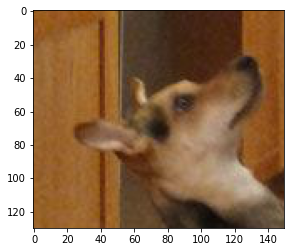

In [ ]:
# crop the image to H: 130, W: 150, C: 3(only RGB channels)
img_cropped = img[:130, :150, :3]
print(img_cropped.shape)
plt.imshow(img_cropped)

## Part 4. Basics of PyTorch [6 pt]

PyTorch is a Python-based neural networks package. Along with tensorflow, PyTorch is currently one of the most popular machine learning libraries.

PyTorch, at its core, is similar to Numpy in a sense that they both 
try to make it easier to write codes for scientific computing
achieve improved performance over vanilla Python by leveraging highly optimized C back-end.
However, compare to Numpy, PyTorch offers much better GPU support and provides many high-level features for machine learning. Technically, Numpy can be used to perform almost every thing PyTorch does. However, Numpy would be a lot slower than PyTorch, especially with CUDA GPU, and it would take more effort to write machine learning related code compared to using PyTorch.

In [ ]:
import torch

### Part (a) -- 1 pt

Use the function `torch.from_numpy` to convert the numpy array `img_cropped` into
a PyTorch tensor. Save the result in a variable called `img_torch`.

In [ ]:
img_torch = torch.from_numpy(img_cropped)

### Part (b) -- 1pt

Use the method `<Tensor>.shape` to find the shape (dimension and size) of `img_torch`.

In [ ]:
img_torch.shape

torch.Size([130, 150, 3])

### Part (c) -- 1pt

How many floating-point numbers are stored in the tensor `img_torch`?

In [ ]:
img_torch.size()

torch.Size([130, 150, 3])

### Part (d) -- 1 pt

What does the code `img_torch.transpose(0,2)` do? What does the expression return? 
Is the original variable `img_torch` updated? Explain.

In [ ]:
#The img_torch.transpose(0,2) swaps the dimensions 0 and 2 with each other.
#The expression returns a tensor that is a transposed version of input. 
##The original variable is not updated. The img_torch.transpose only outputs the transpoed version of the original variable. 
#However, the both input and output tensors share the same underlying storage, so changing the content of one would change the content of the other.

### Part (e) -- 1 pt

What does the code `img_torch.unsqueeze(0)` do? What does the expression return? 
Is the original variable `img_torch` updated? Explain.

In [ ]:
#img_torch.unsqueeze(0) creates a new tensor with a dimension of size one inserted at the dimension 0.
#The expression returns a new tensor with a dimension of size one inserted at the dimension 0.
#It does not update the original variable. But they share the same underlying data. So changing the content of one would change the content of the other.

### Part (f) -- 1 pt

Find the maximum value of `img_torch` along each colour channel? Your output should be a one-dimensional
PyTorch tensor with exactly three values.

Hint: lookup the function `torch.max`.

In [ ]:
print(img_torch.max(0).values.max(0).values)

tensor([0.8941, 0.7882, 0.6745])


## Part 5. Training an ANN [10 pt]

The sample code provided below is a 2-layer ANN trained on the MNIST dataset to identify digits less than 3 or greater than and equal to 3. Modify the code by changing any of the following and observe how the accuracy and error are affected:

- number of training iterations
- number of hidden units
- numbers of layers
- types of activation functions
- learning rate



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt # for plotting
import torch.optim as optim

torch.manual_seed(1) # set the random seed

# define a 2-layer artificial neural network
class Pigeon(nn.Module):
    def __init__(self):
        super(Pigeon, self).__init__()
        self.layer1 = nn.Linear(28 * 28, 30)
        self.layer2 = nn.Linear(30, 10)
        self.layer3 = nn.Linear(10, 1)
       #self.layer4 = nn.Linear(5, 1)
    def forward(self, img):
        flattened = img.view(-1, 28 * 28)
        activation1 = self.layer1(flattened)
        activation1 = F.relu(activation1)
        activation2 = self.layer2(activation1)
        activation2 = F.relu(activation2)
        activation3 = self.layer3(activation2)
        #activation3 = F.relu(activation3)
        #activation4 = self.layer4(activation3)
        return activation3

pigeon = Pigeon()

#tuning parameters:
iterations = 3

# load the data
mnist_data = datasets.MNIST('data', train=True, download=True)
mnist_data = list(mnist_data)
mnist_train = mnist_data[:1000]
mnist_val   = mnist_data[1000:2000]
img_to_tensor = transforms.ToTensor()

for ite in range(iterations):
# simplified training code to train `pigeon` on the "small digit recognition" task
  criterion = nn.BCEWithLogitsLoss()  
  optimizer = optim.SGD(pigeon.parameters(), lr=0.005, momentum=0.9)

  for (image, label) in mnist_train:
    # actual ground truth: is the digit less than 3?
    actual = torch.tensor(label < 3).reshape([1,1]).type(torch.FloatTensor)
    # pigeon prediction
    out = pigeon(img_to_tensor(image)) # step 1-2
    # update the parameters based on the loss
    loss = criterion(out, actual)      # step 3
    loss.backward()                    # step 4 (compute the updates for each parameter)
    optimizer.step()                   # step 4 (make the updates for each parameter)
    optimizer.zero_grad()              # a clean up step for PyTorch


# computing the error and accuracy on the training set
error = 0
for (image, label) in mnist_train:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Training Error Rate:", error/len(mnist_train))
print("Training Accuracy:", 1 - error/len(mnist_train))


# computing the error and accuracy on a test set
error = 0
for (image, label) in mnist_val:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Test Error Rate:", error/len(mnist_val))
print("Test Accuracy:", 1 - error/len(mnist_val))

Training Error Rate: 0.014
Training Accuracy: 0.986
Test Error Rate: 0.065
Test Accuracy: 0.935


In [ ]:
===============Training iterations:===============
TI: 15
Training Error Rate: 0.0
Training Accuracy: 1.0
Test Error Rate: 0.06
Test Accuracy: 0.94
TI: 5
Training Error Rate: 0.004
Training Accuracy: 0.996
Test Error Rate: 0.064
Test Accuracy: 0.9359999999999999
TI:1
Training Error Rate: 0.036
Training Accuracy: 0.964
Test Error Rate: 0.079
Test Accuracy: 0.921
TI:2
Training Error Rate: 0.017
Training Accuracy: 0.983
Test Error Rate: 0.06
Test Accuracy: 0.94
===============Learning rate tuning results:===============
LR: 0.005
Training Error Rate: 0.036
Training Accuracy: 0.964
Test Error Rate: 0.079
Test Accuracy: 0.921
LR:0.004
Training Error Rate: 0.033
Training Accuracy: 0.967
Test Error Rate: 0.084
Test Accuracy: 0.916
LR:0.006
Training Error Rate: 0.037
Training Accuracy: 0.963
Test Error Rate: 0.081
Test Accuracy: 0.919
LR:0.0045
Training Error Rate: 0.033
Training Accuracy: 0.967
Test Error Rate: 0.085
Test Accuracy: 0.915
LR:0.00455
Training Error Rate: 0.032
Training Accuracy: 0.968
Test Error Rate: 0.084
Test Accuracy: 0.916
===============Activation func===============
Tanh:
Training Error Rate: 0.016
Training Accuracy: 0.984
Test Error Rate: 0.068
Test Accuracy: 0.9319999999999999
Sigmod:
Training Error Rate: 0.013
Training Accuracy: 0.987
Test Error Rate: 0.068
Test Accuracy: 0.9319999999999999
===============Layer===============
4 Layers:
Training Error Rate: 0.037
Training Accuracy: 0.963
Test Error Rate: 0.083
Test Accuracy: 0.917
3 layer:
Training Error Rate: 0.014
Training Accuracy: 0.986
Test Error Rate: 0.065
Test Accuracy: 0.935
2 layers:
Training Error Rate: 0.013
Training Accuracy: 0.987
Test Error Rate: 0.068
Test Accuracy: 0.9319999999999999
1 layer:
Training Error Rate: 0.038
Training Accuracy: 0.962
Test Error Rate: 0.106
Test Accuracy: 0.894


### Part (a) -- 3 pt
Comment on which of the above changes resulted in the best accuracy on training data? What accuracy were you able to achieve?

In [ ]:
All parameter selection are based on only changing a single parameter: (e.g: changing number of layers and rest of parameters remain unchanged)

Layers: 2 # The training accuracy when layer is set to 2: 0.987
LR:0.00455 # The best learning rate is found as 0.0045 where the training accuracy is 0.968
TI:1 # The best training result occurs when the iteration is set to 15. The training accuracy is 100%. But this is due to the data overfitting.
Activation func.: Sigmod # The best training accuracy: 0.987

### Part (b) -- 3 pt


Comment on which of the above changes resulted in the best accuracy on testing data? What accuracy were you able to achieve?

In [ ]:
All parameter selection are based on only changing a single parameter: (e.g: changing number of layers and rest of parameters remain unchanged)

Layers: 3 # The testing accuracy when layer is set to 3: 0.935
LR:0.005 # The best learning rate if 0.005 where the training accuracy is 0.921
TI:2 # The best testing accuracy is found as 0.94 when iteration is set to 20 and 2. In order to save the training time, we just set it to 2
Activation func.: Sigmod or Tanh # the testing accuracies are the same, which is 0.932

### Part (c) -- 4 pt
Which model hyperparameters should you use, the ones from (a) or (b)?

In [ ]:
hyperparameters should use the one from (b):
- The best accuracy on training data is less important than the best accuracy on testing data, because they use training data to train this model. 
- In order to avoid overfitting, we should use testing data to evaluate the model. 
- Testing data should be used to determine the performance of the model while tuning the parameters. 